In [1]:
#Install pyupset to generate a visual representation of the "interactions" between datasets 

!pip install pyupset

In [2]:
#Import pyupset and dependencies 

import pyupset as pyu
import matplotlib as mpl
import matplotlib.pyplot as plt
from pickle import load
import pandas as pd
%matplotlib inline

In [70]:
# Read in prokka output summaries in tsv format 
df1=pd.read_table('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/functional_inference/prokka_annotation_megahit/podar_metaG_sub_10_spades.tsv', delimiter = "\t")
df2=pd.read_table('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/functional_inference/prokka_annotation_megahit/podar_metaG_sub_10_megahit.tsv', delimiter = "\t")
df3=pd.read_table('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/functional_inference/prokka_annotation_megahit/podar_metaG_sub_100.tsv', delimiter = "\t")
df4=pd.read_table('/Users/philliptbrooks/Documents/dahak_project/public/dahak/workflows/functional_inference/prokka_annotation_megahit/podar_metaG_100.tsv', delimiter = "\t")

In [84]:
# Create a new dataframe with the column of interest, remove duplicate genes (e.g. hypotheitical protein), 
# and generate csv with the output 

df1a = df1[['gene']]
df2a = df2[['gene']]
df3a = df3[['gene']]
df4a = df4[['gene']]

df1a_unique = df1a.drop_duplicates()
df2a_unique = df2a.drop_duplicates()
df3a_unique = df3a.drop_duplicates()
df4a_unique = df4a.drop_duplicates()

df1a_unique.to_csv("metaG_sub_10.spades.csv")
df2a_unique.to_csv("metaG_sub_10.megahit.csv")
df3a_unique.to_csv("metaG_full_100.spades.csv")
df4a_unique.to_csv("metaG_full_100.megahit.csv")

#frames = [df1a_unique, df2a_unique]
#result = pd.concat(frames, axis=1)
#result.columns = ['metaG_sub_10_spades', 'metaG_sub_10_megahit']
#result

In [89]:
# Import glob and create a dictionary of dataframes with name 'metaG*csv' with ',' delimiter. Split the file names by 
# '_' to generate unique file names for output. 
import glob 

genus_dict={}
for file in glob.glob('metaG*csv'):
    df=pd.read_table(file, delimiter = ",")
    x=file.split('_')[2]
    genus_dict[x]=df

100.megahit.csv
100.spades.csv
10.megahit.csv
10.spades.csv


{'additional': [],
 'base_set_size': <matplotlib.axes._subplots.AxesSubplot at 0x11244f6a0>,
 'figure': <matplotlib.figure.Figure at 0x11de41320>,
 'intersection_bars': <matplotlib.axes._subplots.AxesSubplot at 0x12d4b80f0>,
 'intersection_matrix': <matplotlib.axes._subplots.AxesSubplot at 0x11dd52e10>,
 'names': <matplotlib.axes._subplots.AxesSubplot at 0x11de23898>}

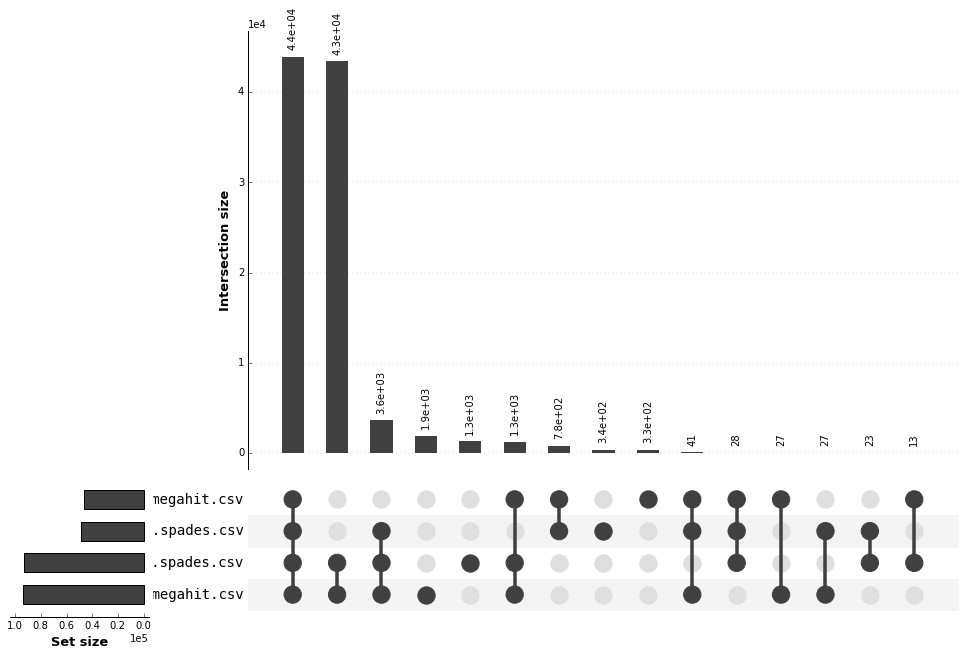

In [90]:
# Generate upset plot of the intersection of between data contained in column labeled 'gene'. 

pyu.plot(genus_dict, unique_keys = ['gene'])